# Analyze Ball on Incline data
Use this notebook to quickly test whether your ball on incline data makes sense!

In [1]:
# Imports
import os, sys
import numpy as np
import matplotlib.pyplot as plt

from iminuit import Minuit
sys.path.append('../../External_Functions')
from ExternalFunctions import Chi2Regression

## Reading the data

The function "read_csv(filename)" takes in a filename and returns numpy arrays with time and voltage.

In [2]:
def read_csv(filename):
    """Read CSV from Waveforms"""
    dat = np.genfromtxt(filename, delimiter=',', skip_header=13, names=True)
    time = dat['Time_s']
    voltage = dat['Channel_1_V']
    return time, voltage

def find_midpoints(time, voltage, show_plot=True):
    """Find midpoints -- quick and dirty"""
    
    # Write a function yourself, which identifies the peaks in the voltage,
    # and returns values for passing times and (possibly) their uncertainties in it.
    t_pass = [0.0, 0.1]
    t_pass_sigma = [0.0001, 0.00001]
    
    return t_pass, t_pass_sigma

Text(0, 0.5, 'Voltage (V)')

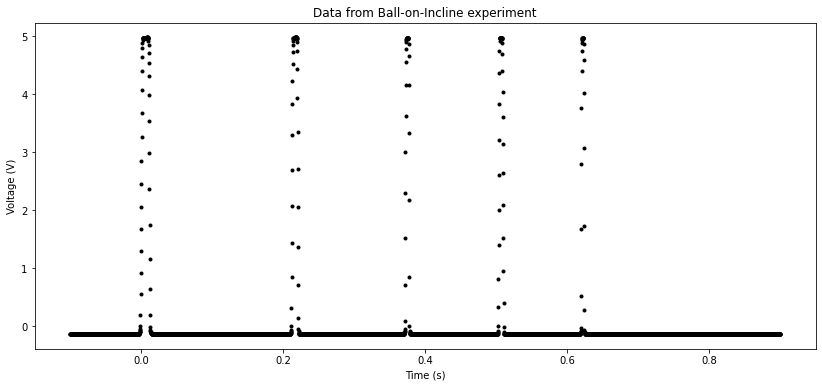

In [3]:
# Read the data and plot it (possibly with passing times in):
filename = 'data_BallOnIncline_example/ball7_8mm_example.csv'

time, voltage = read_csv(filename)
timepass, timepass_sig = find_midpoints(time, voltage)

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(time, voltage, 'k.', label='Measurements')
# ax.set_xlim(chi2_minpos-2*min_fit, chi2_minpos+2*max_fit)
ax.set_title("Data from Ball-on-Incline experiment")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")

In [4]:
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

In [6]:
from sympy import *

g, a, s, v, t, x0, theta, Dt, R, d = symbols("g, a, s, v, t, x_0, theta, Delta_theta, R, d")
dg, da, ds, dv, dt, dx0, dtheta, dDt, dR, dd = symbols("sigma_g, sigma_a, sigma_s, sigma_v, sigma_t, sigma_x_0, sigma_theta, sigma_Delta_theta, sigma_R, sigma_d")
g = (a /sin(theta + Dt))*(1 + (2/5)*(R**2)/(R**2 + (d/2)**2))
#s = 1/2 * a*t**2 + v*t + x0
#a = 2*(s - v*t - x0)/t**2
#da = sqrt((a.diff(t)*dt)**2 + (a.diff(s)*ds)**2)
dg = sqrt((g.diff(a)*da)**2 + (g.diff(theta)*dtheta)**2 + (g.diff(Dt)*dDt)**2 + (g.diff(R)*dR)**2 + (g.diff(d)*dd)**2)
lprint(latex(Eq(symbols('g'), g)))
lprint(latex(Eq(symbols('a'), a)))
lprint(latex(Eq(symbols('sigma_a'), da)))
lprint(latex(Eq(symbols('sigma_g'), dg)))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>